In [1]:
import heeps
from heeps.wavefront.get_array import show_wf
import matplotlib.pyplot as plt

In [2]:
conf = dict(
    mode = 'CVC',
    nframes = 1,#12000,
    hfov = 0.8,
    f_pupil = 'pupil/ELT_fullM1.fits',
    f_lyot_stop = 'pupil/ls_L_RAVC_0.0291_0.0291_0.0317_285.fits',
    f_phase = 'wavefront/cfull/cube_Cfull_20211007_3600s_300ms_0piston_meters_scao_only_L_285.fits',
    lt_dist = 36.67,        # lith trap distance in m (36.67)
    lt_diam = 0.3837,       # lith trap norm diameter (0.3837)
)

In [3]:
verbose = False
def show_LS_plane(**conf):
    conf = heeps.config.read_config(verbose=False, **conf)
    conf = heeps.config.update_config(saveconf=True, verbose=verbose, **conf)
    wf = heeps.pupil.pupil(savefits=True, verbose=verbose, **conf)
    phase_screens, amp_screens, tiptilts, misaligns = heeps.wavefront.load_errors(verbose=verbose, **conf)
    # apply phase screen (scao residuals, ncpa, petal piston)
    wf = heeps.wavefront.add_errors(wf, phase_screen=phase_screens[0], verbose=verbose, **conf)
    wf = heeps.optics.fp_mask(wf, verbose=verbose, **conf)
    show_wf(wf, 'amp', npupil=285, savefits=True)
    wf = heeps.optics.lyot_stop(wf, verbose=verbose, **conf)
    return heeps.optics.detector(wf, verbose=verbose, **conf)

no light trap


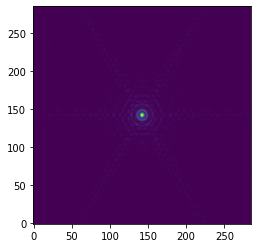

In [4]:
show_LS_plane(**dict(conf, lt_diam=1, lt_dist=0))

no light trap


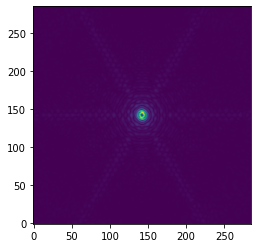

In [5]:
show_LS_plane(**dict(conf, lt_diam=1, lt_dist=.001))

no light trap


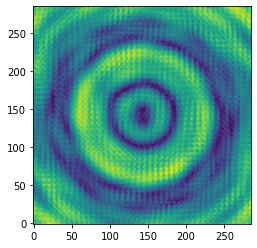

In [6]:
show_LS_plane(**dict(conf, lt_diam=1, lt_dist=0.01))

no light trap


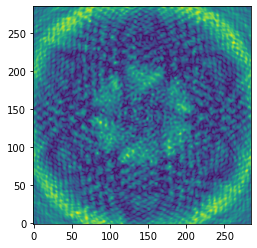

In [7]:
show_LS_plane(**dict(conf, lt_diam=1, lt_dist=0.1))

no light trap


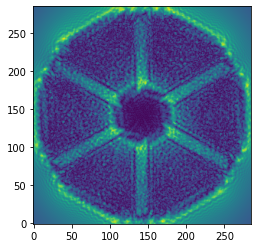

In [8]:
show_LS_plane(**dict(conf, lt_diam=1, lt_dist=1))

no light trap


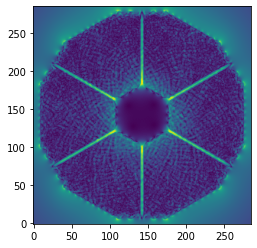

In [9]:
show_LS_plane(**dict(conf, lt_diam=1, lt_dist=36.67))

no light trap


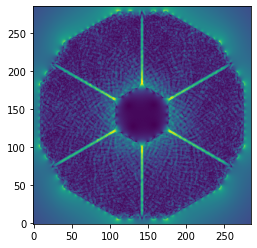

In [10]:
show_LS_plane(**dict(conf, lt_diam=1, lt_dist=658.6))

light trap


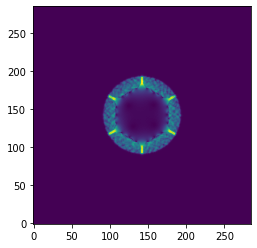

In [11]:
show_LS_plane(**dict(conf, lt_diam=0.3837, lt_dist=36.67))